In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r"C:\Users\HP\Multiple Disease\parkinsons.csv")

# Data Preprocessing


---
 The following steps are performed on the dataset in this section:
 + Dropping Redudant Columns
 + Checking For Duplicated Rows
 + Checking For Missing Values

## Voice Measurement Descriptions

This document provides descriptions of various voice measurement features:

**Fundamental Frequency:**

* **MDVP:Fo(Hz):** Fundamental frequency of the voice. It measures the average rate at which the vocal cords vibrate during phonation.
* **MDVP:Fhi(Hz):** Maximum fundamental frequency of the voice. It indicates the highest pitch reached during the phonation.
* **MDVP:Flo(Hz):** Minimum fundamental frequency of the voice. It represents the lowest pitch reached during the phonation.

**Frequency Variation (Jitter):**

* **MDVP:Jitter(%):** Jitter (local), a measure of frequency variation. It reflects the small variations in frequency during phonation. 
* **MDVP:Jitter(Abs):** Absolute jitter, another measure of frequency variation. It is similar to MDVP:Jitter(%), but expressed in absolute terms.
* **MDVP:RAP:** Relative amplitude perturbation, another measure of frequency variation, focusing on short-term variations.
* **MDVP:PPQ:** Five-point period perturbation quotient. It provides an average of the period differences over five cycles.
* **Jitter:DDP:** Average absolute difference of differences between jitter cycles. It provides an additional measure of short-term frequency variation.

**Amplitude Variation (Shimmer):**

* **MDVP:Shimmer:** Shimmer (local), a measure of amplitude variation. It reflects small variations in amplitude during phonation.
* **MDVP:Shimmer(dB):** Shimmer in decibels, another measure of amplitude variation, expressed in decibels.
* **Shimmer:APQ3:** Three-point amplitude perturbation quotient. It measures the average absolute differences between the amplitude of three consecutive periods.
* **Shimmer:APQ5:** Five-point amplitude perturbation quotient. It provides an average of the amplitude differences over five cycles.
* **MDVP:APQ:** Amplitude perturbation quotient, another measure of amplitude variation, focusing on short-term variations.
* **Shimmer:DDA:** Average absolute difference of differences between shimmer cycles. It provides an additional measure of short-term amplitude variation.

**Signal Characteristics:**

* **NHR:** Noise-to-harmonics ratio. It quantifies the ratio of noise to tonal components in the voice.
* **HNR:** Harmonics-to-noise ratio. It measures the ratio of harmonic components (tonal) to noise components in the voice.
* **RPDE:** Recurrence period density entropy. It measures the disorder or complexity of the signal, reflecting the nonlinear dynamical properties of the voice.
* **DFA:** Detrended fluctuation analysis. It measures the self-similarity or fractal scaling properties of the signal, indicating the long-range correlations in the voice.

**Spectral Characteristics:**

* **spread1:** The first component of the voice spectrum. It reflects the spread of the frequencies around the fundamental frequency.
* **spread2:** The second component of the voice spectrum. It provides an additional measure of the spread of frequencies in the voice signal.

**Complexity:**

* **D2:** Correlation dimension. It measures the complexity of the voice signal, reflecting the number of degrees of freedom in the signal's dynamical system.
* **PPE:** Pitch period entropy. It measures the variation in the length of the fundamental frequency periods, indicating the regularity or irregularity of the phonation.


In [3]:
# Exploring Dataset Content
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [5]:
print('Number of Columns In Dataset :', df.shape[1])
print('Number of Rows In Dataset : ', df.shape[0])

Number of Columns In Dataset : 24
Number of Rows In Dataset :  195


In [6]:
# Dropping The Name Column
df.drop(['name'], axis=1, inplace=True)

In [7]:
print('Number of columns In Dataset :', df.shape[1])
print('Number of rows In Dataset : ', df.shape[0])

Number of columns In Dataset : 23
Number of rows In Dataset :  195


In [8]:
# Exploring Information About Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [9]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


It can be observed that the column **Status** is stored as *int64* datatype. However, since the column contains only two numeric values **0 & 1**, we will be changing the datatype to *uint8*, to save Memory Space. 

In [10]:
df['status'] = df['status'].astype('uint8')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    uint8  
 1

In [12]:
# Checking For Duplicate Rows In Dataset
print('Number of Duplicated Rows :',df.duplicated().sum())

Number of Duplicated Rows : 0


In [13]:
# Checking For Missing Values In Dataset
df.isna().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

# Exploratry Data Analysis

<Axes: xlabel='status', ylabel='count'>

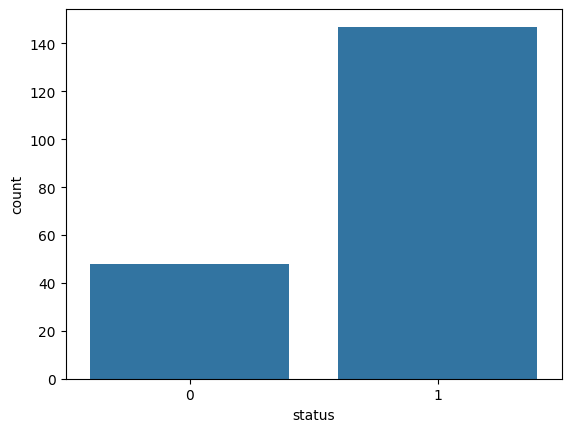

In [14]:
#Balance of Data
sns.countplot(x='status',data=df)

<Axes: >

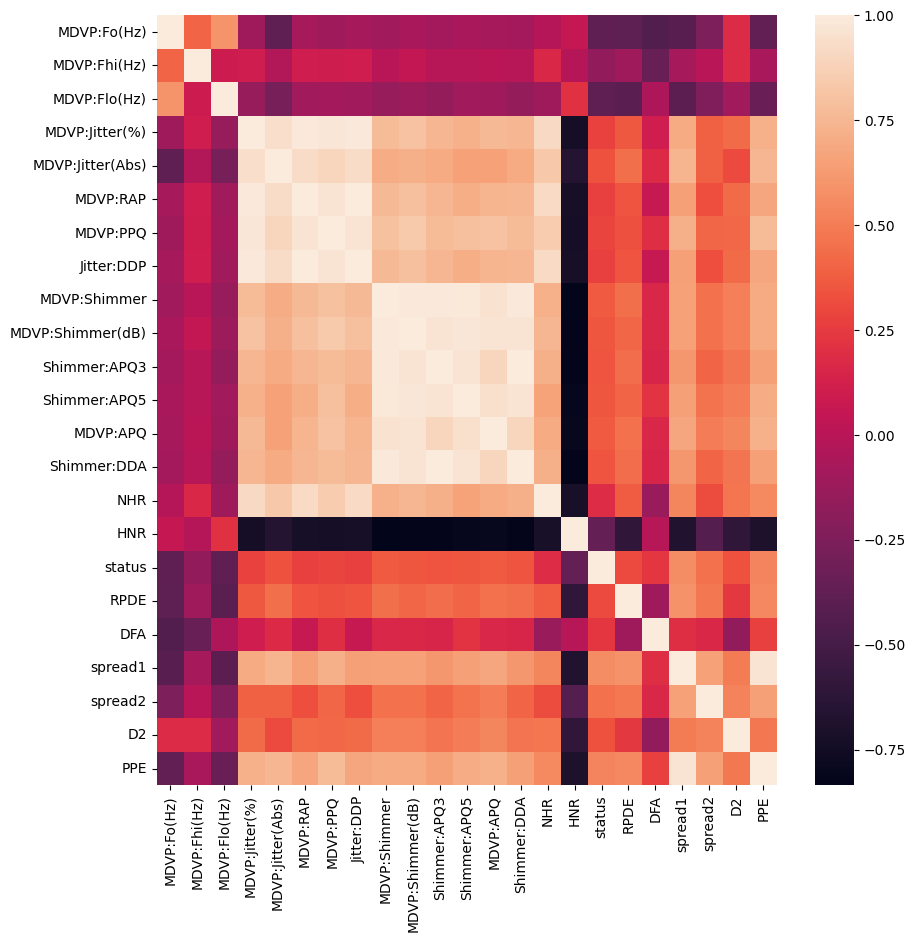

In [15]:
fig = plt.figure(figsize=(10,10))  
sns.heatmap(df.corr())

In this correlation heatmap, we can see that many independent features are highly correlated with eachother.

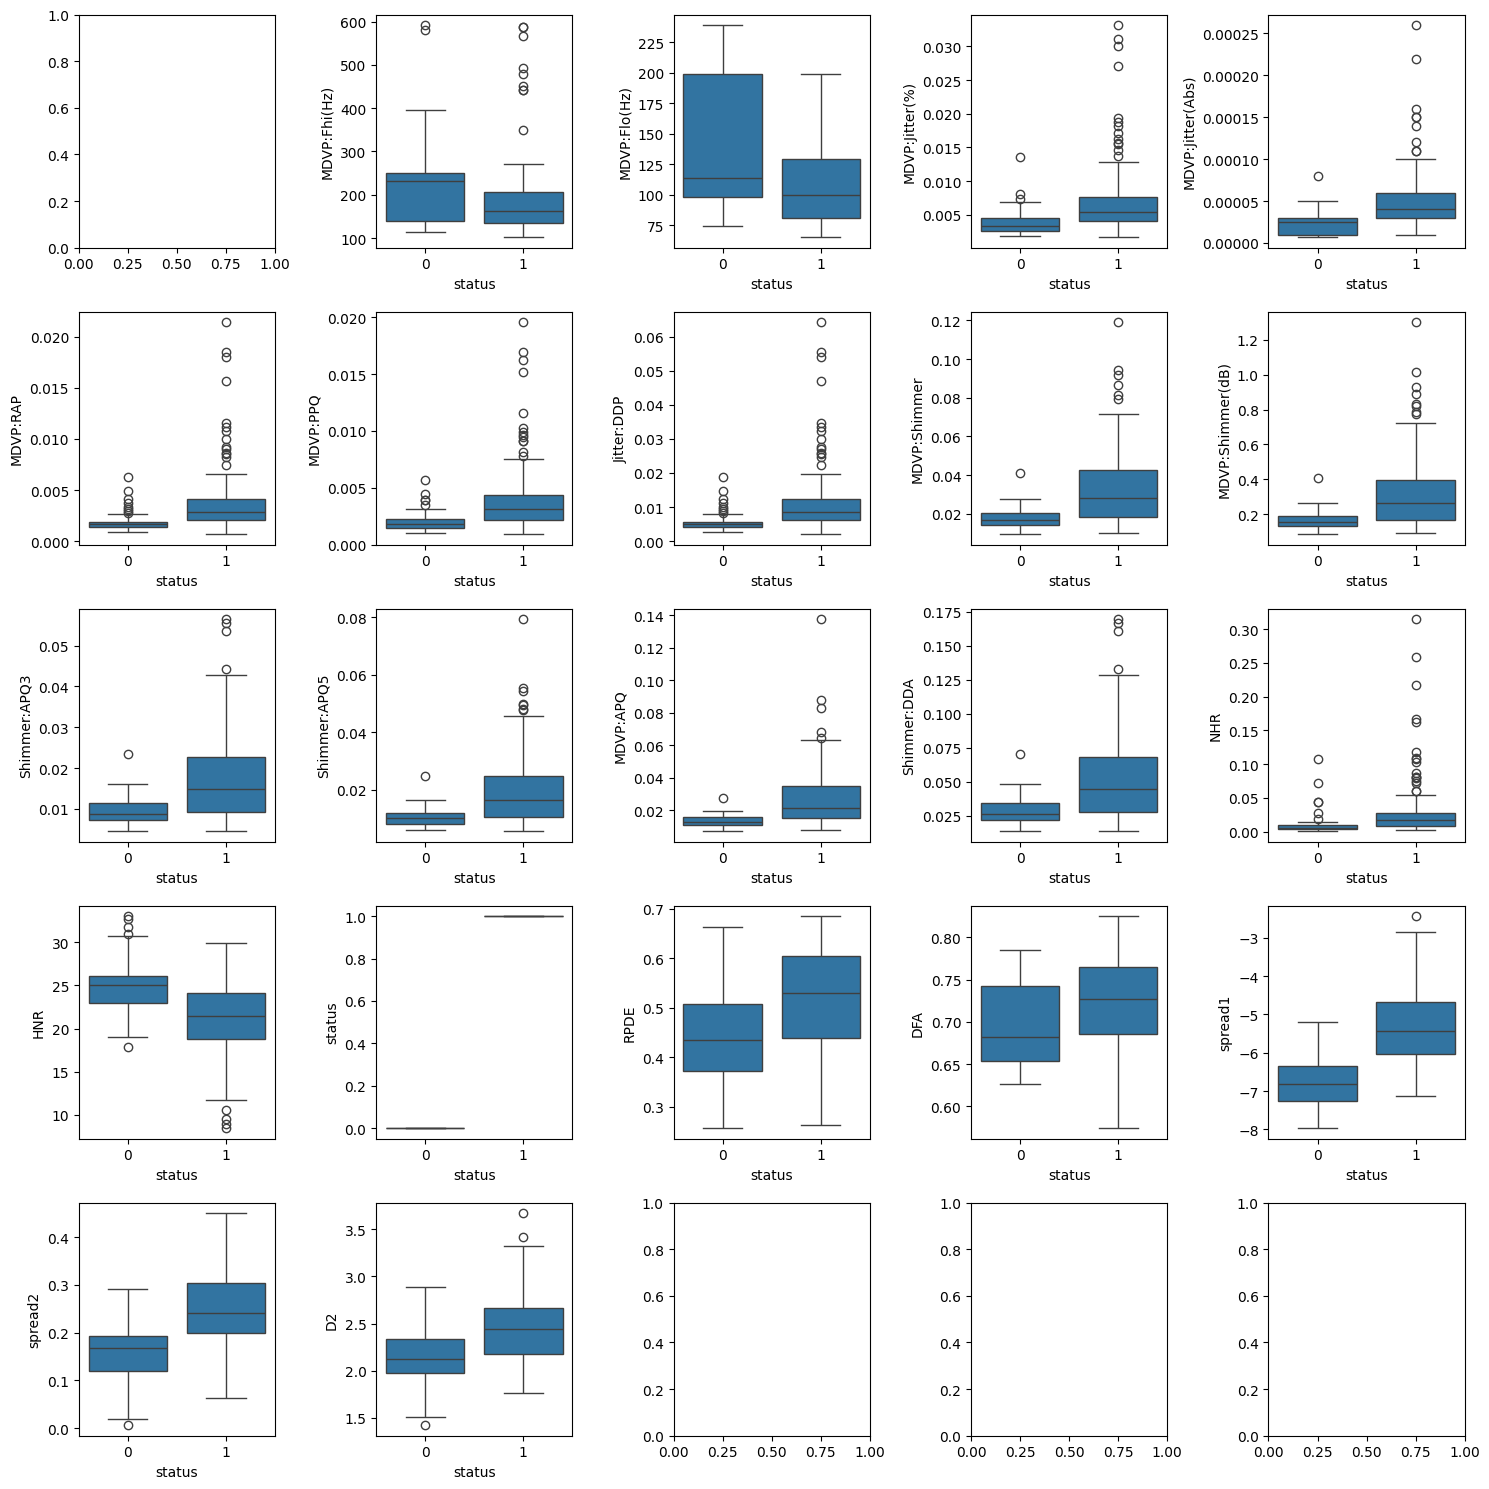

In [16]:
#Box Plot
fig,axes=plt.subplots(5,5,figsize=(15,15))
axes=axes.flatten()

for i in range(1,len(df.columns)-1):
    sns.boxplot(x='status',y=df.iloc[:,i],data=df,orient='v',ax=axes[i])
plt.tight_layout()
plt.show()

From the boxplot shown above it is very evident that if a patient has a lower rate of 'HNR','MDVP:Flo(Hz)','MDVP:Fhi(Hz)','MDVP:Fo(Hz)' ,then he/she is affected by parkinsons disease.

# Balancing Dataset
---
In this section, as it is observed that the Dataset Is Heavily Imbalanced, with Number of Samples of Parkinson Disease Samples being 147, and Non-Parkinson Being only 48. Hence, in this section, we make use of **SMOTE** to **Oversample** and Balance the dataset.

In [17]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
from sklearn.datasets import make_classification



In [18]:
# Exploring Imabalance In Dataset
df['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [19]:
# Extracting Features Into Features & Target
X = df.drop(['status'], axis=1)
y = df['status']

print('Feature (X) Shape Before Balancing :', X.shape)
print('Target (y) Shape Before Balancing :', y.shape)

Feature (X) Shape Before Balancing : (195, 22)
Target (y) Shape Before Balancing : (195,)


In [20]:
# Intialising SMOTE Object
sm = SMOTE(random_state=300)

In [21]:
# Resampling Data
X, y = sm.fit_resample(X, y)

In [22]:
print('Feature (X) Shape After Balancing :', X.shape)
print('Target (y) Shape After Balancing :', y.shape)

Feature (X) Shape After Balancing : (294, 22)
Target (y) Shape After Balancing : (294,)


In [23]:
# Scaling features between -1 and 1  for mormalization 
scaler = StandardScaler()

In [24]:
# splitting the dataset into traning and testing sets into 80 - 20
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.20, random_state=20)

In [25]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

In [26]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
Xtest_pred = logmodel.predict(X_test)  # y_prediction
xtrain_pred = logmodel.predict(X_train)

In [27]:
print("Classification Report:")
print(classification_report(y_test, Xtest_pred))
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, Xtest_pred)
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        33
           1       0.90      0.69      0.78        26

    accuracy                           0.83        59
   macro avg       0.85      0.82      0.82        59
weighted avg       0.84      0.83      0.83        59

Confusion Matrix:
[[31  2]
 [ 8 18]]


In [28]:
tn, fp, fn, tp = conf_matrix.ravel()
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

True Negatives: 31
False Positives: 2
False Negatives: 8
True Positives: 18


In [29]:
from sklearn.metrics import precision_score,recall_score ,accuracy_score, f1_score, r2_score, log_loss

chart = {
        'Metric':["Accuracy", "F1-Score", "Recall", "Precision"],
        'Logistic Regression':[accuracy_score(y_test, Xtest_pred), f1_score(y_test, Xtest_pred), recall_score(y_test, Xtest_pred), precision_score(y_test, Xtest_pred)]
}
chart = pd.DataFrame(chart)

In [30]:
chart

,Metric,Logistic Regression
0,Accuracy,0.830508
1,F1-Score,0.782609
2,Recall,0.692308
3,Precision,0.900000


In [31]:
tn, fp, fn, tp = conf_matrix.ravel()
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

True Negatives: 31
False Positives: 2
False Negatives: 8
True Positives: 18


## Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
RF = RandomForestClassifier(random_state=42)

In [54]:
RF.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [60]:
y_pred = RF.predict(X_test)
xtrain_pred = RF.predict(X_train)

In [61]:
accuracy_score(xtrain_pred,y_train)

1.0

In [56]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.96      0.92      0.94        26

    accuracy                           0.95        59
   macro avg       0.95      0.95      0.95        59
weighted avg       0.95      0.95      0.95        59

Confusion Matrix:
[[32  1]
 [ 2 24]]


In [57]:
tn, fp, fn, tp = conf_matrix.ravel()
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

True Negatives: 32
False Positives: 1
False Negatives: 2
True Positives: 24


In [58]:
chart = {
        'Metric':["Accuracy","F1-Score", "Recall", "Precision"],
        'Random Forest Classifier':[accuracy_score(y_test, y_pred),f1_score(y_test, y_pred), recall_score(y_test,y_pred), precision_score(y_test, y_pred)]
}
chart = pd.DataFrame(chart)

In [59]:
chart

,Metric,Random Forest Classifier
0,Accuracy,0.949153
1,F1-Score,0.941176
2,Recall,0.923077
3,Precision,0.960000


<li>Clearly Random Forest Classifier is good for this model</li>

In [45]:
# Get feature importances
feature_importances = RF.feature_importances_

# Create a DataFrame to display feature importances
features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
            'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
            'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
            'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
            'spread2', 'D2', 'PPE']

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 2-3 most important features
print("Top most important features:")
print(feature_importance_df.head(3))


Top most important features:
    Feature  Importance
21      PPE    0.138891
18  spread1    0.105763
19  spread2    0.087787


In [46]:
X.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

In [47]:
import numpy as np
input = (184.0,253.0,137.0,1.34,0.012,0.23,0.28,0.004,0.32,0.08,0.015,0.017,0.016,0.006,29.0,21.0,0.48,0.67,0.032,0.028,0.14,0.21) #normal

input_data_as_numpy_array = np.asarray(input)
newdata = input_data_as_numpy_array.reshape(1, -1)

stand_data = scaler.transform(newdata)


prediction = RF.predict(stand_data)
print(prediction)

# Assuming top_features is a DataFrame containing the top features
top_features = feature_importance_df['Feature'].head(3)

# Extract the corresponding values from the input_data array
top_feature_values = input_data_as_numpy_array[list(top_features.index)]

# Display the top 3 features and their values when the prediction is non-diabetic
if prediction == 0:
    print("Person is normal.")
    print("Top 3 features contributing to normal/non-parkinson prediction:")
    for i in range(len(top_features)):
        feature = top_features.iloc[i]
        value = top_feature_values[i]
        print(f"{feature}: {value}")
else:
    print("Person is having Parkinson Problem.")
    print("Top 3 features contributing to Parkinson prediction:")
    for i in range(len(top_features)):
        feature = top_features.iloc[i]
        value = top_feature_values[i]
        print(f"{feature}: {value}")



[1]
Person is having Parkinson Problem.
Top 3 features contributing to Parkinson prediction:
PPE: 0.21
spread1: 0.032
spread2: 0.028


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [48]:
import pickle

In [49]:
model_filename = 'Park_trained_model.sav'
pickle.dump(logmodel, open(model_filename, 'wb'))

# Save the scalar used for standardization
scalar_filename = 'Park_scalar.sav'
pickle.dump(scaler, open(scalar_filename, 'wb'))



In [ ]:
# Load the trained model
Parkinsons_model = pickle.load(open('Park_trained_model.sav', 'rb'))

# Load the scalar used for standardization
Parkinson_scalar = pickle.load(open('Park_scalar.sav', 'rb'))



In [ ]:
import numpy as np
input = (184.0,253.0,137.0,1.34,0.012,0.23,0.28,0.004,0.32,0.08,0.015,0.017,0.016,0.006,29.0,21.0,0.48,0.67,0.032,0.028,0.14,0.21) #normal

input_data_as_numpy_array = np.asarray(input)
newdata = input_data_as_numpy_array.reshape(1, -1)

stand_data = Parkinson_scalar.transform(newdata)


prediction = Parkinsons_model.predict(stand_data)
print(prediction)

# Assuming top_features is a DataFrame containing the top features
top_features = feature_coefficients['Feature'].head(3)

# Extract the corresponding values from the input_data array
top_feature_values = input_data_as_numpy_array[list(top_features.index)]

# Display the top 3 features and their values when the prediction is non-diabetic
if prediction == 0:
    print("Person is normal.")
    print("Top 3 features contributing to normal/non-parkinson prediction:")
    for i in range(len(top_features)):
        feature = top_features.iloc[i]
        value = top_feature_values[i]
        print(f"{feature}: {value}")
else:
    print("Person is having Parkinson Problem.")
    print("Top 3 features contributing to Parkinson prediction:")
    for i in range(len(top_features)):
        feature = top_features.iloc[i]
        value = top_feature_values[i]
        print(f"{feature}: {value}")

